In [10]:
import numpy as np
import os

# Load the preprocessed data for Kyrgyz letters and Russian words
X_kyrgyz_train = np.load('../data/processed/handwritten_kyrgyz_letters/X_kyrgyz_train.npy')
y_kyrgyz_train = np.load('../data/processed/handwritten_kyrgyz_letters/y_kyrgyz_train.npy')
X_kyrgyz_val = np.load('../data/processed/handwritten_kyrgyz_letters/X_kyrgyz_val.npy')
y_kyrgyz_val = np.load('../data/processed/handwritten_kyrgyz_letters/y_kyrgyz_val.npy')
X_kyrgyz_test = np.load('../data/processed/handwritten_kyrgyz_letters/X_kyrgyz_test.npy')
y_kyrgyz_test = np.load('../data/processed/handwritten_kyrgyz_letters/y_kyrgyz_test.npy')

X_russian_train = np.load('../data/processed/cyrillic_words/X_russian_train.npy')
y_russian_train = np.load('../data/processed/cyrillic_words/y_russian_train.npy')
X_russian_val = np.load('../data/processed/cyrillic_words/X_russian_val.npy')
y_russian_val = np.load('../data/processed/cyrillic_words/y_russian_val.npy')
X_russian_test = np.load('../data/processed/cyrillic_words/X_russian_test.npy')
y_russian_test = np.load('../data/processed/cyrillic_words/y_russian_test.npy')



In [11]:
# Check the shapes of the loaded datasets
print(f"Kyrgyz training data shape: {X_kyrgyz_train.shape}, Labels shape: {y_kyrgyz_train.shape}")
print(f"Russian training data shape: {X_russian_train.shape}, Labels shape: {y_russian_train.shape}")

Kyrgyz training data shape: (39872, 32, 32, 1), Labels shape: (39872,)
Russian training data shape: (57828, 32, 128), Labels shape: (57828,)


In [12]:
# Function to pad the Kyrgyz letter images to match the width of Russian word images (128 pixels)
def pad_images(X_data, target_width=128):
    padded_data = []
    for img in X_data:
        padding = ((0, 0), (0, target_width - img.shape[1]))  # Add padding to the right side
        img_padded = np.pad(img.squeeze(), padding, mode='constant', constant_values=0)  # Add zero padding
        padded_data.append(img_padded.reshape(img.shape[0], target_width, 1))  # Keep shape (height, width, 1)
    return np.array(padded_data)

In [15]:
# Reshape Russian words data to add the channel dimension (grayscale -> 1 channel)
X_russian_train = X_russian_train.reshape(X_russian_train.shape[0], X_russian_train.shape[1], X_russian_train.shape[2], 1)
X_russian_val = X_russian_val.reshape(X_russian_val.shape[0], X_russian_val.shape[1], X_russian_val.shape[2], 1)
X_russian_test = X_russian_test.reshape(X_russian_test.shape[0], X_russian_test.shape[1], X_russian_test.shape[2], 1)

In [16]:
# Function to pad the Kyrgyz letter images to match the width of Russian word images (128 pixels)
def pad_images(X_data, target_width=128):
    padded_data = []
    for img in X_data:
        padding = ((0, 0), (0, target_width - img.shape[1]))  # Add padding to the right side
        img_padded = np.pad(img.squeeze(), padding, mode='constant', constant_values=0)  # Add zero padding
        padded_data.append(img_padded.reshape(img.shape[0], target_width, 1))  # Keep shape (height, width, 1)
    return np.array(padded_data)


In [17]:
# Pad Kyrgyz training, validation, and test sets to match Russian word width (128 pixels)
X_kyrgyz_train_padded = pad_images(X_kyrgyz_train, target_width=128)
X_kyrgyz_val_padded = pad_images(X_kyrgyz_val, target_width=128)
X_kyrgyz_test_padded = pad_images(X_kyrgyz_test, target_width=128)

In [19]:
# Now combine Kyrgyz and Russian data (stack them together)
X_train_combined = np.concatenate([X_kyrgyz_train_padded, X_russian_train])
y_train_combined = np.concatenate([y_kyrgyz_train, y_russian_train])

X_val_combined = np.concatenate([X_kyrgyz_val_padded, X_russian_val])
y_val_combined = np.concatenate([y_kyrgyz_val, y_russian_val])

X_test_combined = np.concatenate([X_kyrgyz_test_padded, X_russian_test])
y_test_combined = np.concatenate([y_kyrgyz_test, y_russian_test])

In [20]:
# Check combined shapes
print(f"Combined training data shape: {X_train_combined.shape}, Labels shape: {y_train_combined.shape}")
print(f"Combined validation data shape: {X_val_combined.shape}, Labels shape: {y_val_combined.shape}")
print(f"Combined test data shape: {X_test_combined.shape}, Labels shape: {y_test_combined.shape}")

Combined training data shape: (97700, 32, 128, 1), Labels shape: (97700,)
Combined validation data shape: (24426, 32, 128, 1), Labels shape: (24426,)
Combined test data shape: (19382, 32, 128, 1), Labels shape: (19382,)


In [21]:
# Save the combined data
os.makedirs('../data/processed/combined', exist_ok=True)

np.save('../data/processed/combined/X_train_combined.npy', X_train_combined)
np.save('../data/processed/combined/y_train_combined.npy', y_train_combined)
np.save('../data/processed/combined/X_val_combined.npy', X_val_combined)
np.save('../data/processed/combined/y_val_combined.npy', y_val_combined)
np.save('../data/processed/combined/X_test_combined.npy', X_test_combined)
np.save('../data/processed/combined/y_test_combined.npy', y_test_combined)

In [24]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Visualize a few samples from the combined training set
def visualize_samples(X_data, y_data, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_data[i].squeeze(), cmap='gray')
        plt.title(f"Label: {y_data[i]}")
        plt.axis('off')
    plt.show()

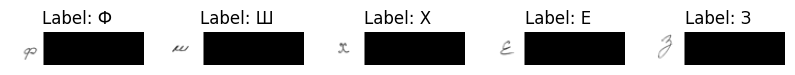

In [27]:
# Visualize a few samples from the combined training set
visualize_samples(X_train_combined, y_train_combined)